In [2]:
import pandas as pd
import numpy as np
import requests
import json
import datetime

Earliest travel times for the orange line (From Oak Grove(70036) to Malden Center (70034)) is 04 May 2016 @ 5:00 am

In [3]:
api_key = 'IAZkS7mDd0SPwAZUAuHPLQ'
realtime_url = 'http://realtime.mbta.com/developer/api/v2.1/'

In [17]:
# Define parameters for the query URL

# Can choose (traveltimes, dwelltimes, headways, dailymetrics, currentmetrics, dailypredictionmetrics, predictionmetrics, events, pastalerts)
p_query = 'traveltimes?'
from_stop = '70036'
to_stop = '70034'
route = 'Orange' # Optional
from_datetime = str(round(datetime.datetime(2016,5,4,5,30,00).timestamp()))
to_datetime = str(round(datetime.datetime(2016,5,4,7,30,00).timestamp()))
stop = '' 

"""
1. Events URL = 
    Output: "http://realtime.mbta.com/developer/api/v2.1/events?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&from_datetime=1537812000&to_datetime=1537819200&stop=70027&route=Orange"

2. Travel Time URL: f'{realtime_url}{p_query}api_key={api_key}&format=json&from_stop={from_stop}&to_stop={to_stop}&from_datetime={from_datetime}&to_datetime={to_datetime}'

    Output = http://realtime.mbta.com/developer/api/v2.1/traveltimes?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&from_stop=70172&to_stop=70182&from_datetime=1457454139&to_datetime=1457455262

3. Dwell Times URL:
    Output: http://realtime.mbta.com/developer/api/v2.1/dwells?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&stop=70076&from_datetime=1457454139&to_datetime=1457454749

4. Headway URL: 
    Output: http://realtime.mbta.com/developer/api/v2.1/headways?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&stop=70076&from_datetime=1457455186&to_datetime=1457456986
"""

'\n1. Events URL = realtime_url + p_query + "api_key=" + api_key + "&format=json& + "&from_datetime=" + from_datetime + "&to_datetime=" + to_datetime + &stop=" + stop + "&route=" + route\n    Output: "http://realtime.mbta.com/developer/api/v2.1/events?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&from_datetime=1537812000&to_datetime=1537819200&stop=70027&route=Orange"\n\n2. Travel Time URL: realtime_url + p_query + "api_key=" + api_key + "&format=json" + "&from_stop=" + from_stop + "&to_stop=" + to_stop + "&from_datetime=" + from_datetime + "&to_datetime=" + to_datetime \n    Output = http://realtime.mbta.com/developer/api/v2.1/traveltimes?api_key=wX9NwuHnZU2ToO7GmGR9uw&format=json&from_stop=70172&to_stop=70182&from_datetime=1457454139&to_datetime=1457455262\n\n3. Dwell Times URL: realtime_url + p_query + "api_key=" + api_key + "&format=json" + "&stop=" + stop + "&from_datetime=" + from_datetime + "&to_datetime=" + to_datetime \n    Output: http://realtime.mbta.com/developer/api/v2.1/dwel

### Determining stop_id's for Oak Grove and Malden Center

In [22]:
df_stops = pd.read_csv('stops.txt')

In [36]:
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
0,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,-71.082754,ExpressBus-Downtown,NaN,https://www.mbta.com/stops/1,NaN,0,NaN,1,Boston,Washington Street,Ruggles Street,3.0
1,10,10.0,Theo Glynn Way @ Newmarket Sq,NaN,NaN,NaN,42.330555,-71.068787,NaN,NaN,https://www.mbta.com/stops/10,NaN,0,NaN,1,Boston,Theodore Glynn Way,Newmarket Square,3.0
2,10000,10000.0,Tremont St opp Temple Pl,NaN,NaN,NaN,42.355692,-71.062911,NaN,NaN,https://www.mbta.com/stops/10000,NaN,0,NaN,1,Boston,Tremont Street,Temple Place,3.0
3,10003,10003.0,Albany St opp Randall St,NaN,NaN,NaN,42.331591,-71.076237,NaN,NaN,https://www.mbta.com/stops/10003,NaN,0,NaN,0,Boston,Albany Street,Randall Street,3.0
4,10005,10005.0,Albany St opp E Concord St,NaN,NaN,NaN,42.335017,-71.071280,NaN,NaN,https://www.mbta.com/stops/10005,NaN,0,NaN,1,Boston,Albany Street,East Concord Street,3.0


In [42]:
df_stops_orange = df_stops[(df_stops['stop_name'].str.contains('Malden Center')) | (df_stops['stop_name'].str.contains('Oak Grove'))]

In [52]:
def inter(x):
    try:
        return int(x)
    except:
        return 0

In [59]:
df_stops_orange['stop_id'] = df_stops_orange['stop_id'].apply(inter)

In [61]:
df_stops_orange_filter = df_stops_orange[df_stops_orange['stop_id'] > 0]

In [140]:
df_stops_orange_filter.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
5011,5991,5991.0,Washington St opp Oak Grove Sta,NaN,NaN,NaN,42.436927,-71.071292,NaN,NaN,https://www.mbta.com/stops/5991,NaN,0,NaN,1,Malden,Washington Street,NaN,3.0
7339,9326,9326.0,Washington St @ Oak Grove Station,NaN,NaN,NaN,42.436901,-71.071145,NaN,NaN,https://www.mbta.com/stops/9326,NaN,0,NaN,1,Malden,Washington Street,NaN,3.0
8921,5072,5072.0,Malden Center,Malden Center - West Busway,NaN,West Busway,42.426729,-71.074659,NaN,NaN,https://www.mbta.com/stops/place-mlmnl,level_0.5_ground,0,place-mlmnl,0,Malden,NaN,NaN,3.0
8922,5327,5327.0,Malden Center,Malden Center - East Busway Platform 2,2,East Busway Platform 2,42.426507,-71.073919,NaN,NaN,https://www.mbta.com/stops/place-mlmnl,level_ground,0,place-mlmnl,0,Malden,Busway,NaN,3.0
8923,53270,53270.0,Malden Center,Malden Center - East Busway Platform 1,1,East Busway Platform 1,42.426565,-71.074107,NaN,NaN,https://www.mbta.com/stops/place-mlmnl,level_ground,0,place-mlmnl,0,Malden,Busway,NaN,3.0


### Travel Times from Oak Grove to Malden Center

In [45]:
from_datetime = round(datetime.datetime(2016,5,4,5,30,00).timestamp())
to_datetime = round(datetime.datetime(2016,5,4,7,30,00).timestamp())

url = f'{realtime_url}{p_query}api_key={api_key}&format=json&from_stop={from_stop}&to_stop={to_stop}&from_datetime={from_datetime}&to_datetime={to_datetime}'
print(url)
json_response = requests.get(url).json()['travel_times'] 

if json_response == []:
    print('Nothing in here!')

http://realtime.mbta.com/developer/api/v2.1/traveltimes?api_key=IAZkS7mDd0SPwAZUAuHPLQ&format=json&from_stop=70036&to_stop=70034&from_datetime=1462354200&to_datetime=1462361400


In [86]:
df_travel_times = pd.DataFrame()

for date in pd.date_range(f'2016-5-1 05:30:00', f'2020-2-1', freq='B', tz= 'US/Eastern'):

    from_datetime = round(date.timestamp())
    to_datetime = round((date + pd.Timedelta(2, unit='h')).timestamp())

    url = f'{realtime_url}{p_query}api_key={api_key}&format=json&from_stop={from_stop}&to_stop={to_stop}&from_datetime={from_datetime}&to_datetime={to_datetime}'
 
    json_response = requests.get(url).json()['travel_times']

    if df_travel_times.empty:

        if json_response != []:
            df_travel_times = pd.DataFrame.from_dict(json_response)
    else:
        if json_response != []:
            travel = pd.DataFrame.from_dict(json_response)
            df_travel_times = pd.concat([df_travel_times, travel])

In [87]:
with open('mbta_travel_times.csv', 'w', newline='') as mbta_file:
    df_travel_times.to_csv(mbta_file, index=False)

In [88]:
df_travel_times.shape

(12762, 8)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

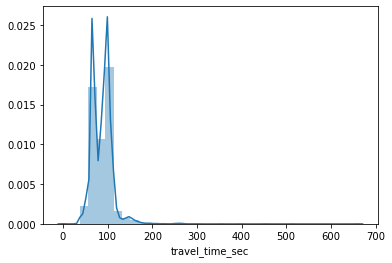

In [89]:
sns.distplot(df_travel_times['travel_time_sec'], bins=35)

In [90]:
df_travel_times.describe()

,route_id,direction,dep_dt,arr_dt,travel_time_sec,benchmark_travel_time_sec,threshold_flag_1,threshold_flag_2
count,12762,12762,12762,12762,12762,12762,8,2
unique,1,1,12762,12762,191,2,1,1
top,Orange,0,1564484766,1472465207,66,120,threshold_id_04,threshold_id_05
freq,12762,12762,1,1,668,10583,8,2


In [93]:
df_travel_times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   route_id                   12762 non-null  object
 1   direction                  12762 non-null  object
 2   dep_dt                     12762 non-null  object
 3   arr_dt                     12762 non-null  object
 4   travel_time_sec            12762 non-null  object
 5   benchmark_travel_time_sec  12762 non-null  object
 6   threshold_flag_1           8 non-null      object
 7   threshold_flag_2           2 non-null      object
dtypes: object(8)
memory usage: 1.2+ MB
